<a href="https://colab.research.google.com/github/barkamoljon/Practice/blob/main/Diabetes_detection%7CPractice_for_portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Bismillah.Alhamdulillah.Va Solatu va Salama a`la Rosulillah**


###**Vazifa**

Quyidagi ma’lumotlar to’plami Hindistonning Qandli diabet va buyrak kasalliklari milliy institutidan olingan. Maqsad diagnostik o’lchovlar asosida bemorda diabet bor-yo’qligini taxmin qilishdir.
###**Tarkib**

Dataset ichida barcha bemorlar kamida 21 yoshli ayollari.
###**Ustunlar**

    Pregnancies: homilador bo’lish soni
    Glucose: glyukozaga test natijasi
    BloodPressure: diastolik qon bosimi (mm Hg)
    SkinThickness: Triceps teri burmasining qalinligi (mm)
    Insulin: 2 soatlik sarum insulini (mu U/ml)
    BMI: Tana massasi indeksi (vazn kg / (m bo’yi) ^ 2)
    DiabetesPedigreeFunction: diabetning naslchilik funktsiyasi
    Age: Yosh (yil)
    Outcome: Class (0 – diabet yo’q, 1 – diabet)

Dataset: https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv


In [ ]:
#Keraklik kutubxonalarni chaqirib olamiz
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import roc_curve, roc_auc_score,auc,RocCurveDisplay

In [ ]:
# Onlayn dataset joylashgan manzilini ko'rsatamiz
URL = "https://github.com/anvarnarz/praktikum_datasets/blob/main/diabetes.csv?raw=true"
df = pd.read_csv(URL)
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
532,1,86,66,52,65,41.3,0.917,29,0
28,13,145,82,19,110,22.2,0.245,57,0
40,3,180,64,25,70,34.0,0.271,26,0
523,9,130,70,0,0,34.2,0.652,45,1
216,5,109,62,41,129,35.8,0.514,25,1
10,4,110,92,0,0,37.6,0.191,30,0
687,1,107,50,19,0,28.3,0.181,29,0
557,8,110,76,0,0,27.8,0.237,58,0
252,2,90,80,14,55,24.4,0.249,24,0
566,1,99,72,30,18,38.6,0.412,21,0


In [ ]:
df.shape

(768, 9)

In [ ]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
index = df[df['Outcome']==0].iloc[list(range(0,232))].index

In [ ]:
df2 = df.drop(index)

In [ ]:
df2['Outcome'].value_counts()

1    268
0    268
Name: Outcome, dtype: int64

In [ ]:
corr_matrix = df2.corr().abs()
corr_matrix.style.background_gradient(cmap='hot')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.116842,0.159803,0.083924,0.082762,0.016063,0.029127,0.520104,0.241824
Glucose,0.116842,1.000000,0.158317,0.074128,0.294478,0.210858,0.106079,0.244039,0.491366
BloodPressure,0.159803,0.158317,1.000000,0.232032,0.087081,0.258736,0.053976,0.241785,0.065895
SkinThickness,0.083924,0.074128,0.232032,1.000000,0.444784,0.390406,0.218321,0.104389,0.076800
Insulin,0.082762,0.294478,0.087081,0.444784,1.000000,0.157707,0.147377,0.027845,0.128273
BMI,0.016063,0.210858,0.258736,0.390406,0.157707,1.000000,0.172149,0.028617,0.310419
DiabetesPedigreeFunction,0.029127,0.106079,0.053976,0.218321,0.147377,0.172149,1.000000,0.007160,0.164030
Age,0.520104,0.244039,0.241785,0.104389,0.027845,0.028617,0.007160,1.000000,0.245027
Outcome,0.241824,0.491366,0.065895,0.076800,0.128273,0.310419,0.164030,0.245027,1.000000


In [ ]:
df2.corrwith(df['Outcome']).abs().sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.491366
BMI                         0.310419
Age                         0.245027
Pregnancies                 0.241824
DiabetesPedigreeFunction    0.164030
Insulin                     0.128273
SkinThickness               0.076800
BloodPressure               0.065895
dtype: float64

### ML ga tayyorlaymiz

In [ ]:
X = df2[['Glucose','BMI','Age']].values
y = df2['Outcome']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
#Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

##**Eng yaxshi k ni topish**

###**`for` yordamida**

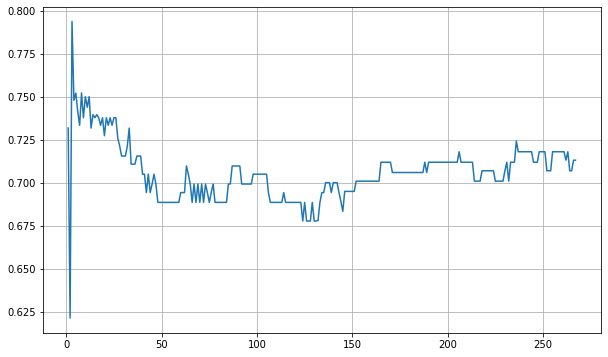

In [ ]:
f1 = []
for k in range(1,268):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,268),f1)
plt.grid()
plt.show()

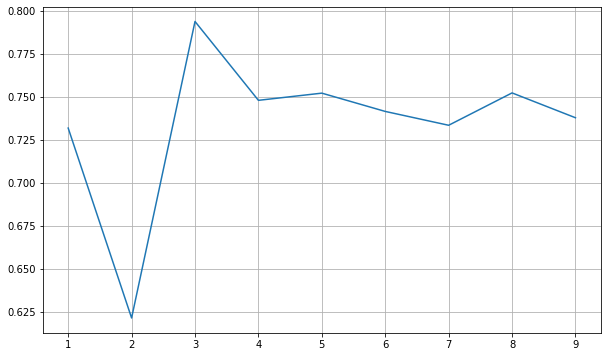

In [ ]:
# Yaqinlashtirib ko`ramiz
f1 = []
for k in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_predict = knn.predict(X_test)
  f1.append(f1_score(y_test, y_predict))

plt.figure(figsize=(10,6))
plt.plot(range(1,10),f1)
plt.grid()
plt.show()

###**Grid Search yordamida**

In [ ]:
knn = KNeighborsClassifier()

param_grid ={'n_neighbors' : np.arange(1,25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)

knn_gscv.fit(X , y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])})

In [ ]:
knn_gscv.best_params_

{'n_neighbors': 8}

In [ ]:
knn_gscv.best_score_

0.7928868120456906

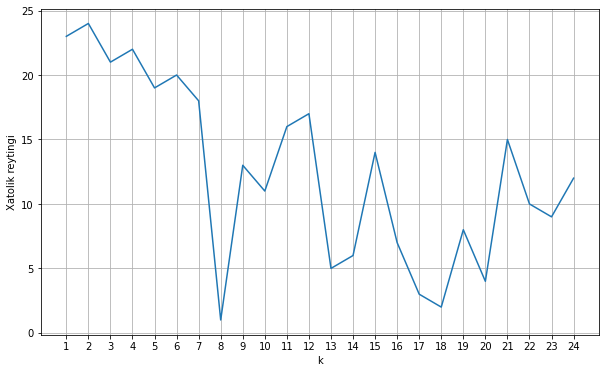

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(param_grid['n_neighbors'], knn_gscv.cv_results_['rank_test_score'])
plt.xticks(param_grid['n_neighbors'])
plt.xlabel("k")
plt.ylabel("Xatolik reytingi")
plt.grid()
plt.show()

###ML

In [ ]:
#k-NN
knn = KNeighborsClassifier(n_neighbors=3)#k ni qiymati

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict = knn.predict(X_test)

###**Baholash**

##**Jaccard index**


In [ ]:
jaccard_score(y_test, y_predict)

0.6578947368421053

###**Confusion matrix**

Model aniqligi: 0.7592592592592593


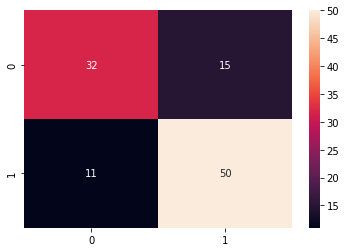

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_predict), annot=True)
print("Model aniqligi:", accuracy_score(y_test,y_predict))
plt.show()

###**Random Forect**

              precision    recall  f1-score   support

           0       0.66      0.62      0.64        47
           1       0.72      0.75      0.74        61

    accuracy                           0.69       108
   macro avg       0.69      0.69      0.69       108
weighted avg       0.69      0.69      0.69       108

Model aniqligi: 0.6944444444444444


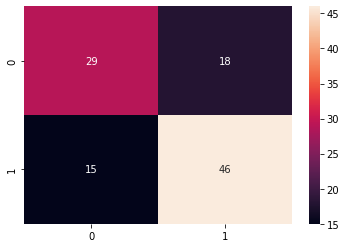

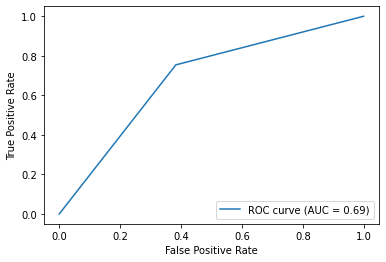

In [ ]:
# Modelni tuzamiz (training)
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = RF_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

###**Precision, recall, F1**

In [ ]:
precision = precision_score(y_test,y_predict)
recall = recall_score(y_test,y_predict)
f1 = f1_score(y_test,y_predict)
accuracy = accuracy_score(y_test,y_predict)
print('precision:',precision)
print('recall:',recall)
print('f1:',f1)
print('accuracy:',accuracy)

precision: 0.7692307692307693
recall: 0.819672131147541
f1: 0.7936507936507937
accuracy: 0.7592592592592593


In [ ]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71        47
           1       0.77      0.82      0.79        61

    accuracy                           0.76       108
   macro avg       0.76      0.75      0.75       108
weighted avg       0.76      0.76      0.76       108



###**Cross-validation yordamida tekshiramiz**

In [ ]:
# Cross validation
predict = cross_val_predict(estimator = knn, X = X, y = y, cv = 5)


#Modelni baholash
print("Model aniqligi:", accuracy_score(y_test,y_pred))
print('Classification Report: \n', classification_report(y, predict))

Model aniqligi: 0.6944444444444444
Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.75      0.74       268
           1       0.75      0.73      0.74       268

    accuracy                           0.74       536
   macro avg       0.74      0.74      0.74       536
weighted avg       0.74      0.74      0.74       536



##**Decision Tree**

              precision    recall  f1-score   support

           0       0.67      0.68      0.67        47
           1       0.75      0.74      0.74        61

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.71      0.71      0.71       108

Model aniqligi: 0.7129629629629629


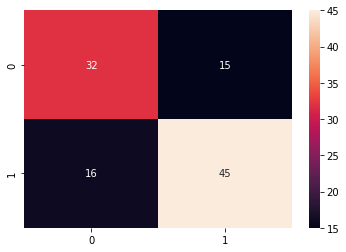

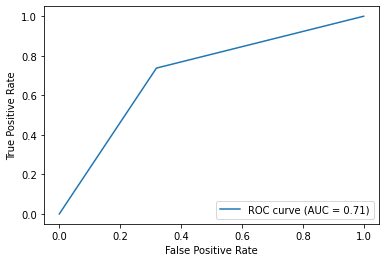

In [ ]:
# Modelni yaratamiz (training)
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = tree_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

###**XGBoost**

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        47
           1       0.71      0.77      0.74        61

    accuracy                           0.69       108
   macro avg       0.69      0.68      0.68       108
weighted avg       0.69      0.69      0.69       108

Model aniqligi: 0.6944444444444444


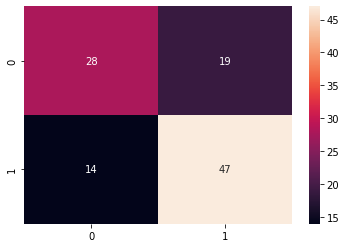

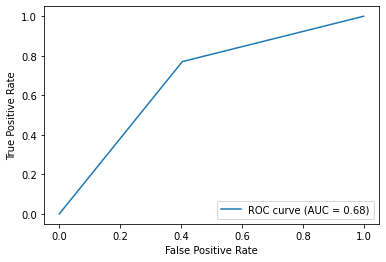

In [ ]:
# Modelni yaratamiz (training)
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()